# AI-Driven Stock Price Prediction 

#### Problem Statement: 

You have been tasked with developing an AI-driven stock price prediction system. This project will utilize historical stock data, apply machine learning techniques, and deploy the model on cloud platforms (AWS & Azure) for real-time predictions. 

✅ Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ✅1. Data Collection 
___

#### A . **Data Retrieval:** Collect historical stock price data from Yahoo Finance or Alpha Vantage API. 
___

* Install yfinance for dataset 

       pip install yfinance


In [45]:
import yfinance as yf

#Fetching 'Apple' historical Stock Details  

data=yf.download('AAPL',start="2025-02-28",end="2025-04-01",interval='1d')

print(data.head(30))

print(data.tail(10))



[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-02-28  241.839996  242.089996  230.199997  236.949997  56833400
2025-03-03  238.029999  244.029999  236.110001  241.789993  47184000
2025-03-04  235.929993  240.070007  234.679993  237.710007  53798100
2025-03-05  235.740005  236.550003  229.229996  235.419998  47227600
2025-03-06  235.330002  237.860001  233.160004  234.440002  45170400
2025-03-07  239.070007  241.369995  234.759995  235.110001  46273600
2025-03-10  227.479996  236.160004  224.220001  235.539993  72071200
2025-03-11  220.839996  225.839996  217.449997  223.809998  76137400
2025-03-12  216.979996  221.750000  214.910004  220.139999  62547500
2025-03-13  209.679993  216.839996  208.419998  215.949997  61368300
2025-03-14  213.490005  213.949997  209.580002  211.250000  60107600
2025-03-17  214.000000  215.220001

In [3]:
data['Close']

Ticker,AAPL
Date,
2020-01-02,72.716072
2020-01-03,72.009117
2020-01-06,72.582909
2020-01-07,72.241547
2020-01-08,73.403625
...,...
2025-02-24,247.100006
2025-02-25,247.039993
2025-02-26,240.360001



### **Understanding the Output Columns:**
| Column  | Description |
|---------|------------|
| **Open** | Opening price of the stock on a particular day |
| **High** | Highest price of the stock on that day |
| **Low**  | Lowest price of the stock on that day |
| **Close,Price** | Closing price of the stock on that day |
| **Volume** | Total number of shares traded on that day |



In [4]:
data.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [5]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-02-14', '2025-02-18', '2025-02-19', '2025-02-20',
               '2025-02-21', '2025-02-24', '2025-02-25', '2025-02-26',
               '2025-02-27', '2025-02-28'],
              dtype='datetime64[ns]', name='Date', length=1297, freq=None)

In [6]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

___

#### B. **Data Cleaning**: Preprocess the data by handling missing values, outliers, and formatting it appropriately. 
___

##### **Flattening MultiIndex : Converting MultiIndex to Single Index**
Flattening MultiIndex means converting complex, nested column names (like `('Close', 'AAPL')`) into simple, single-level names (`"Close"`). This is necessary because MultiIndex makes it difficult to access, rename, and process data, causing errors in operations like filtering, visualization, and machine learning.

In [7]:
# Flatten MultiIndex columns without renaming
data.columns = [col[0] for col in data.columns]

In [8]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [9]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403625,73.706256,71.943736,71.943736,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600


In [10]:
data.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

##### Handling Missing Values : 

In [11]:
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [12]:
data.index.isnull().sum()

0

##### Checking for Outliers

In [13]:
from scipy import stats

z_score = np.abs(stats.zscore(data))

outliers_columns = data.columns[(z_score > 3).any(axis=0)]

print("Columns : ")

for i in outliers_columns:
    print(i)

Columns : 
Volume


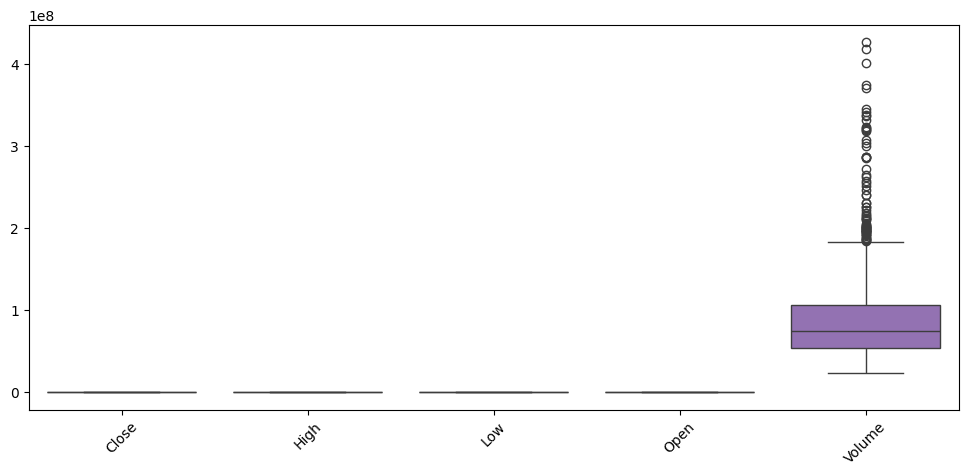

In [14]:
plt.figure(figsize=(12,5))

sns.boxplot(data)

plt.xticks(rotation=45)

plt.show()

* Removing Outliers

In [15]:
data=data[np.abs(stats.zscore(data['Volume']))<2]

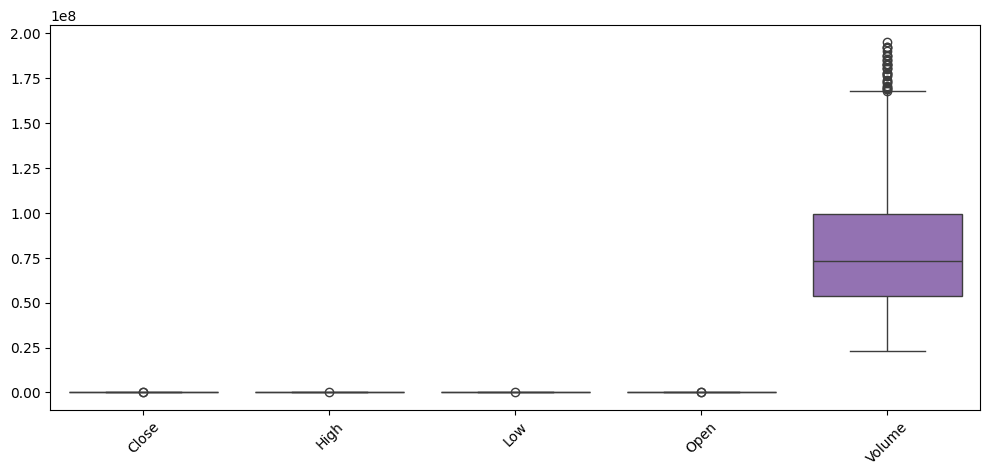

In [16]:
plt.figure(figsize=(12,5))

sns.boxplot(data)

plt.xticks(rotation=45)

plt.show()

In [17]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403625,73.706256,71.943736,71.943736,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600


* Checking Duplicate Values

In [18]:
duplicates=data.duplicated().sum()

print(duplicates)

0


In [19]:
data

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200
2020-01-07,72.241547,72.849224,72.021231,72.592594,108872000
2020-01-08,73.403625,73.706256,71.943736,71.943736,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600


## ✅2. Data Visualization 
___

#### **A. Charting :** 
Use libraries such as Matplotlib and Seaborn to create line charts of historical stock prices. 

___

* Import Required Libraries :

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Ploting the Closing Prices Using Matplotlib and Seaborn

* Lineplot

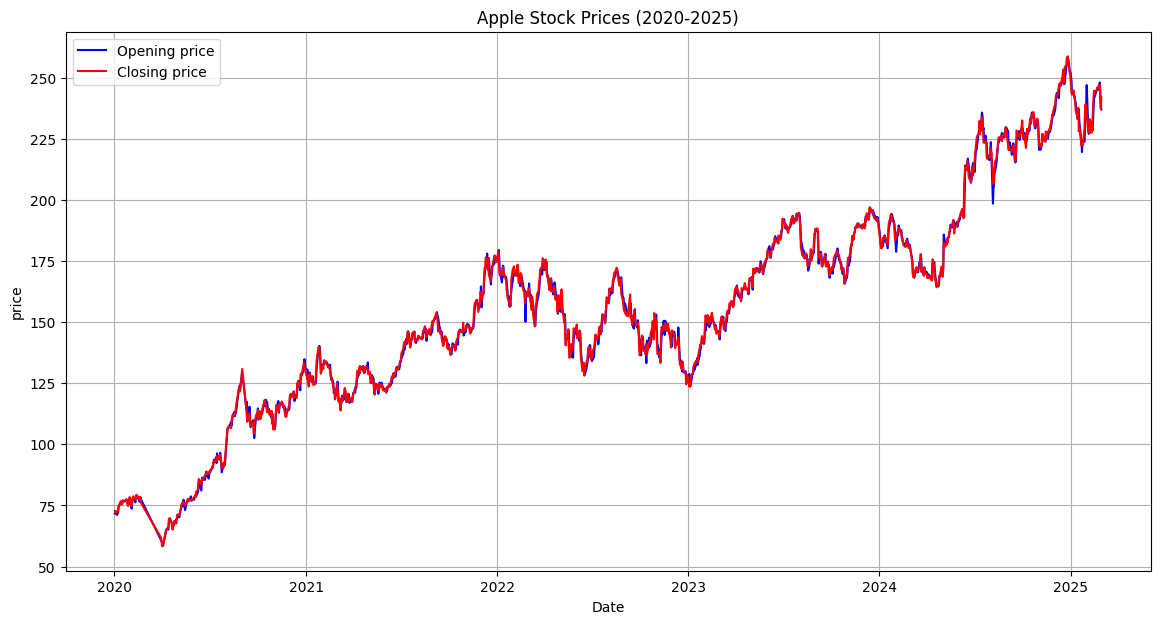

In [21]:
plt.figure(figsize=(14,7))

sns.lineplot(data=data,x=data.index,y='Open',label='Opening price',color='blue')
sns.lineplot(data=data,x=data.index,y='Close',label='Closing price',color='red')

plt.title("Apple Stock Prices (2020-2025)")

plt.xlabel("Date")

plt.ylabel('price')

plt.legend()

plt.grid(True)

plt.show()




## ✅3. Machine Learning Model 
___

### **A. Feature Engineering:**  

Generate technical indicators such as moving averages, RSI, MACD, and Bollinger Bands.

✅ **Moving Average (MA)**:  
A moving average smooths out stock price fluctuations by calculating the average price over a set number of days. It helps identify trends in stock prices.

✅ **Simple Moving Average (SMA)**:  
SMA is the average of closing prices over a fixed period (e.g., 50 days). Each value is equally weighted.

✅ **Exponential Moving Average (EMA)**:  
EMA gives more importance to recent prices, making it react faster to price changes compared to SMA.

📊 **Key Difference**:  
- **SMA** = Simple average over a period.  
- **EMA** = Recent prices have more weight, making it more responsive to trends.

#### ✅**1. RSI** :

**Relative Strength Index (RSI)** is a momentum indicator that measures the speed and magnitude of recent price changes to evaluate overbought or oversold conditions in a stock.

RSI Range: 0 to 100

Above 70 → Overbought (possible downtrend) -> Price may drop soon-> Best Time to Sell

Below 30 → Oversold (possible uptrend) -> Price may rise soon -> Best time to Buy


**RSI FORMULA:**

RSI = 100 - (100 / (1 + RS))

RS=   gain over N days / loss over N days

By default, N = 14 days.



#### ✅**1. MACD** :

MACD is a trend-following indicator used in stock price prediction to identify buy and sell signals based on moving averages.

It consists of three components:

1️⃣ MACD Line = (12-day EMA) - (26-day EMA) → Shows momentum changes.

2️⃣ Signal Line = 9-day EMA of MACD Line → Helps spot trend reversals.used to identify buy/sell signals.

3️⃣ Histogram = Difference between MACD Line and Signal Line → Shows strength of the trend.

How to Use It?

✅ Buy Signal → When MACD Line crosses above the Signal Line 📈

✅ Sell Signal → When MACD Line crosses below the Signal Line 📉

Example:
If a stock’s MACD Line moves above the Signal Line, it indicates strong buying momentum → Possible uptrend.


#### ✅4. **Bollinger Bands** :

Bollinger Bands are a technical analysis tool used to measure market volatility and identify overbought or oversold conditions.

They consist of three lines:

Upper Band = Moving Average + (Standard Deviation × Factor)

Middle Band = Simple Moving Average (SMA)

Lower Band = Moving Average - (Standard Deviation × Factor)

How It Works in Stock Trading

✅ If price touches the Upper Band → The stock is overbought (may go down) → Sell signal

✅ If price touches the Lower Band → The stock is oversold (may go up) → Buy signal

✅ If price stays between the bands → The market is stable

In [22]:
import ta

# Create a clean copy to work on
data = data[data['Close'] > 0].copy()

# Then calculate indicators
data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)
data['EMA_20'] = ta.trend.ema_indicator(data['Close'], window=20)
data['RSI_14'] = ta.momentum.rsi(data['Close'], window=14)

macd = ta.trend.macd(data['Close'])
macd_signal = ta.trend.macd_signal(data['Close'])
data['MACD'] = macd
data['Signal_Line'] = macd_signal

bb = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2)
data['BB_Middle'] = bb.bollinger_mavg()
data['BB_Upper'] = bb.bollinger_hband()
data['BB_Lower'] = bb.bollinger_lband()

# Drop NaNs after all indicators are calculated
data.dropna(inplace=True)


In [23]:
data

,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI_14,MACD,Signal_Line,BB_Middle,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,
2020-03-05,71.085526,72.694481,70.719078,71.716485,187572800,77.202790,76.672809,33.875064,0.117557,0.791380,77.202790,80.905413,73.500168
2020-03-30,61.837040,62.009344,60.524146,60.849338,167976400,76.430292,75.259879,21.778174,-1.069554,0.419193,76.430292,84.081582,68.779002
2020-04-01,58.463810,60.359133,58.031842,59.820385,176218400,75.500269,73.660253,19.099198,-2.256528,-0.115951,75.500269,86.434662,64.565875
2020-04-02,59.439365,59.492755,57.490653,58.325470,165934000,74.732328,72.305883,22.084325,-3.082955,-0.709352,74.732328,87.720553,61.744104
2020-04-03,58.585144,59.626235,57.993007,58.922468,129880000,73.815878,70.999146,21.341746,-3.763451,-1.320172,73.815878,88.530791,59.100964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,237.186266,239.208467,63.021810,2.668829,0.824450,237.186266,250.253319,224.119213
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,238.057889,239.954326,62.907016,2.931527,1.245865,238.057889,251.310841,224.804936
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600,238.175973,239.992962,51.633130,2.571060,1.510904,238.175973,251.466729,224.885216


In [24]:
data.isnull().sum()

Close          0
High           0
Low            0
Open           0
Volume         0
SMA_20         0
EMA_20         0
RSI_14         0
MACD           0
Signal_Line    0
BB_Middle      0
BB_Upper       0
BB_Lower       0
dtype: int64

___
#### **B. Correlation Analysis**: 

Visualize relationships between stock prices and external factors (e.g., trading volume, moving averages). 

#### 2. Heatmaps for Correlation Matrices

Heatmaps provide a comprehensive view of correlations between multiple financial metrics, such as **opening price, closing price, volume, and moving averages**.

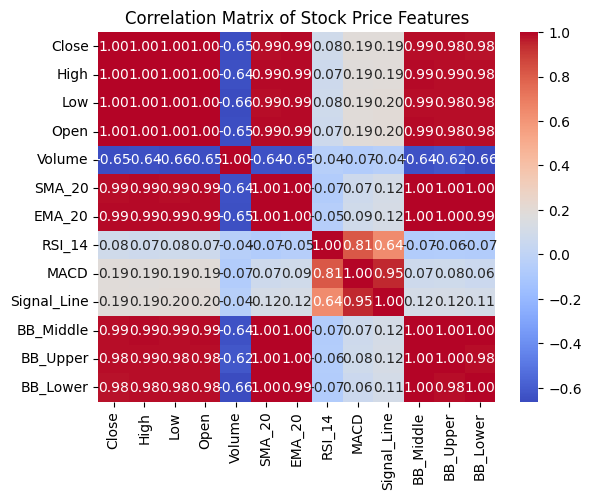

In [25]:
corr_matrix =data.corr()


plt.Figure(figsize=(10,6))

sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix of Stock Price Features")
plt.show()

___
## **B. Model Development:**

### Implement time series forecasting using models like **LSTM, ARIMA, or Prophet**. 

In [26]:
data

,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI_14,MACD,Signal_Line,BB_Middle,BB_Upper,BB_Lower
Date,,,,,,,,,,,,,
2020-03-05,71.085526,72.694481,70.719078,71.716485,187572800,77.202790,76.672809,33.875064,0.117557,0.791380,77.202790,80.905413,73.500168
2020-03-30,61.837040,62.009344,60.524146,60.849338,167976400,76.430292,75.259879,21.778174,-1.069554,0.419193,76.430292,84.081582,68.779002
2020-04-01,58.463810,60.359133,58.031842,59.820385,176218400,75.500269,73.660253,19.099198,-2.256528,-0.115951,75.500269,86.434662,64.565875
2020-04-02,59.439365,59.492755,57.490653,58.325470,165934000,74.732328,72.305883,22.084325,-3.082955,-0.709352,74.732328,87.720553,61.744104
2020-04-03,58.585144,59.626235,57.993007,58.922468,129880000,73.815878,70.999146,21.341746,-3.763451,-1.320172,73.815878,88.530791,59.100964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,237.186266,239.208467,63.021810,2.668829,0.824450,237.186266,250.253319,224.119213
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,238.057889,239.954326,62.907016,2.931527,1.245865,238.057889,251.310841,224.804936
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600,238.175973,239.992962,51.633130,2.571060,1.510904,238.175973,251.466729,224.885216


In [27]:
data.to_csv("Apple_Stock_Data.csv")


### ✅1. LSTM (Long Short-Term Memory) :

LSTM is a type of Recurrent Neural Network (RNN) designed to handle sequential data by remembering past information for long periods.

🔹 Why use LSTM for stock price prediction?

Stock prices follow a time series pattern where past values influence future prices.

LSTM can capture trends and dependencies over time, unlike traditional models that treat each data point independently.

It prevents the vanishing gradient problem, making it better than regular RNNs for long sequences.

#### 2️⃣ Prepare Data for LSTM (Convert to Sequences)

LSTMs require sequential input, so we need to structure the data in input-output pairs.


Instead of feeding individual prices, we use past n days (sequence length) to predict the next day.


#### **How does this work?**

- Instead of feeding individual prices, we use **past `n` days (sequence length) to predict the next day**.  

- Example with a **sequence length of 3**:  

| Day | Stock Price | Input (X) | Output (y) |
|---|---|---|---|
| 1 | 100 | - | - |
| 2 | 102 | - | - |
| 3 | 105 | `[100, 102, 105]` | 108 |
| 4 | 108 | `[102, 105, 108]` | 110 |
| 5 | 110 | `[105, 108, 110]` | 115 |

Each row takes the past `n` days (e.g., `X = [100, 102, 105]`) and predicts the next day's price (`y = 108`).



#### Build LSTM model

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data[['Close']])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Split data 80-20
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=150, 
                    validation_data=(X_test, y_test))


Epoch 1/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0451 - val_loss: 0.0062
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0050 - val_loss: 0.0149
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0030 - val_loss: 0.0069
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 9/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 10/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 12/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step

**Typical MAE Ranges:**  
| **MAE** | **Interpretation** |
|---------|--------------------|
| **< 2** | 🔥 Excellent prediction |
| **2 - 5** | ✅ Good, reasonable performance |
| **5 - 10** | ⚠️ Acceptable but needs improvement |
| **> 10** | ❌ Poor, model needs tuning |

**Typical MSE Ranges:**  
| **MSE** | **Interpretation** |
|---------|--------------------|
| **< 10** | 🔥 Excellent prediction |
| **10 - 50** | ✅ Good, reasonable performance |
| **50 - 200** | ⚠️ Acceptable but can be improved |
| **> 200** | ❌ Poor, model needs tuning |

---

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

mae = mean_absolute_error(y_test_orig, predictions)
mse = mean_squared_error(y_test_orig, predictions)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
MAE: 4.86
MSE: 32.28


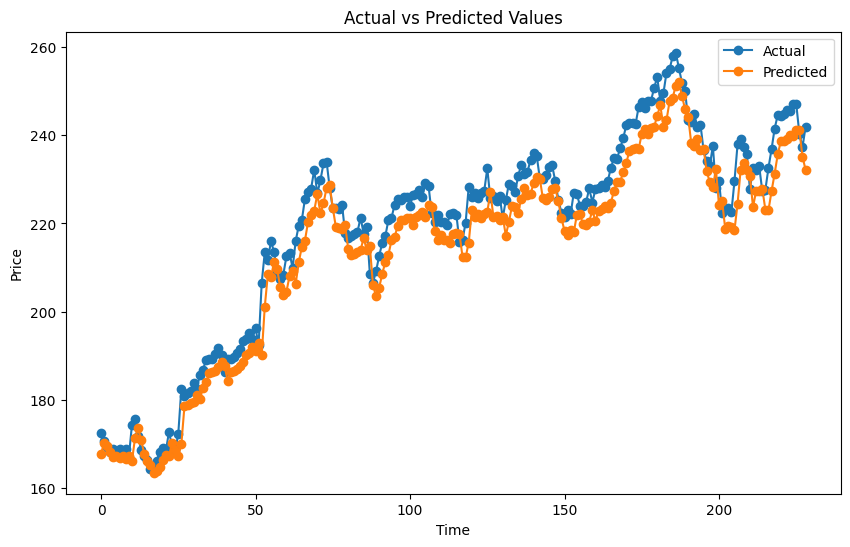

In [32]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(predictions , label='Predicted', marker='o')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
future_predictions = []
current_batch = scaled_data[-seq_length:].reshape((1, seq_length, 1))

for _ in range(30):
    next_pred = model.predict(current_batch)[0]
    future_predictions.append(next_pred)
    current_batch = np.append(current_batch[:,1:,:], [[next_pred]], axis=1)

future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━

In [34]:
future_prices

array([[236.09288],
       [231.18094],
       [226.62738],
       [222.42706],
       [218.52374],
       [214.88905],
       [211.50006],
       [208.33754],
       [205.38383],
       [202.62183],
       [200.03455],
       [197.60555],
       [195.31926],
       [193.16136],
       [191.11902],
       [189.18095],
       [187.33737],
       [185.5799 ],
       [183.90143],
       [182.29594],
       [180.7583 ],
       [179.28415],
       [177.86977],
       [176.51195],
       [175.20786],
       [173.95496],
       [172.75102],
       [171.59396],
       [170.4819 ],
       [169.41307]], dtype=float32)

In [35]:
import pandas as pd

# Predicted prices
predictions = np.array(future_prices)

# Create a date range for the next 30 days starting from 2025-04-01
dates = pd.bdate_range(start='2025-03-01', periods=30)

# Create a DataFrame with dates and predictions
df_predictions = pd.DataFrame({'Date': dates, 'Predicted Price': predictions.flatten()})

print(df_predictions)


         Date  Predicted Price
0  2025-03-03       236.092880
1  2025-03-04       231.180939
2  2025-03-05       226.627380
3  2025-03-06       222.427063
4  2025-03-07       218.523743
5  2025-03-10       214.889053
6  2025-03-11       211.500061
7  2025-03-12       208.337540
8  2025-03-13       205.383835
9  2025-03-14       202.621826
10 2025-03-17       200.034546
11 2025-03-18       197.605545
12 2025-03-19       195.319260
13 2025-03-20       193.161362
14 2025-03-21       191.119019
15 2025-03-24       189.180954
16 2025-03-25       187.337372
17 2025-03-26       185.579895
18 2025-03-27       183.901428
19 2025-03-28       182.295944
20 2025-03-31       180.758301
21 2025-04-01       179.284149
22 2025-04-02       177.869766
23 2025-04-03       176.511948
24 2025-04-04       175.207855
25 2025-04-07       173.954956
26 2025-04-08       172.751022
27 2025-04-09       171.593964
28 2025-04-10       170.481903
29 2025-04-11       169.413071


In [36]:
model.save('Stock Predictions Model.keras')

## ✅2. ARIMA :




---

### 📌 What is ARIMA?

**ARIMA** stands for:

- **A**uto**R**egressive (AR)
- **I**ntegrated (I)
- **M**oving **A**verage (MA)

It's a **time series forecasting model** — it predicts future values based on **past data**.


### 💡 Real-World Analogy

Imagine you're trying to guess tomorrow's stock price by:

- Looking at **how prices have moved in the past** (AR),
- **Smoothing out trends** (I),
- And **removing noise** or randomness (MA).



### 🔍 ARIMA Components (p, d, q)

#### 1. **AR (AutoRegressive) → `p`**
- Uses **past values** to predict the next value.
- Example: If the last few days were 100, 102, 104… it assumes a pattern and tries to continue it.

#### 2. **I (Integrated) → `d`**
- Makes the data **stationary** .
- This means ARIMA looks at **changes** in prices, not raw prices.

#### 3. **MA (Moving Average) → `q`**
- Uses **past prediction errors** to improve future predictions.
- Helps in reducing random spikes.


### 📈 How ARIMA Predicts Stock Prices

1. You feed ARIMA **historical stock prices**.
2. It analyzes the **trend** and **noise**.
3. It tries to **predict the next value** using:
   - Recent prices (AR),
   - Difference between values (I),
   - Past errors (MA).
4. You can then forecast the next 5, 10, or more days.




### 🔥 **LSTM is better than ARIMA for future stock price prediction.**



| Feature                          | ARIMA       | LSTM           |
|----------------------------------|-------------|----------------|
| Understands complex patterns     | ❌ No       | ✅ Yes         |
| Learns from multiple indicators  | ❌ No       | ✅ Yes         |
| Works well for future prediction | ❌ Not great| ✅ Better      |
| Handles real-world data noise    | ❌ No       | ✅ Yes         |
| Needs less data                  | ✅ Yes       | ❌ Needs more  |




In [37]:
print(data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2025-02-24  247.100006  248.860001  244.419998  244.929993  51326400   
2025-02-25  247.039993  250.000000  244.910004  248.000000  48013300   
2025-02-26  240.360001  244.979996  239.130005  244.330002  44433600   
2025-02-27  237.300003  242.460007  237.059998  239.410004  41153600   
2025-02-28  241.839996  242.089996  230.199997  236.949997  56833400   

                SMA_20      EMA_20     RSI_14      MACD  Signal_Line  \
Date                                                                   
2025-02-24  237.186266  239.208467  63.021810  2.668829     0.824450   
2025-02-25  238.057889  239.954326  62.907016  2.931527     1.245865   
2025-02-26  238.175973  239.992962  51.633130  2.571060     1.510904   
2025-02-27  238.086117  239.736490  47.439018  2.015240     1.611771   
2025-02-28  238.311664  239.936824  53.477077  1.918968     1.6

In [38]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load data (assuming df is already loaded)
close_series = data['Close']

# Split data (last 30 days as test)
train, test = close_series[:-30], close_series[-30:]

# ARIMA Implementation
def arima_forecast():
    # Model training
    model = ARIMA(train, order=(2,1,2))  # Simplified parameters
    model_fit = model.fit()
    
    # Forecast
    arima_forecast = model_fit.forecast(steps=30)
    
    # Evaluation
    rmse = np.sqrt(mean_squared_error(test, arima_forecast))
    mae = mean_absolute_error(test, arima_forecast)
    
    # Future prediction
    final_model = ARIMA(close_series, order=(2,1,2)).fit()
    future_arima = final_model.forecast(steps=30)
    
    return future_arima, {'RMSE': rmse, 'MAE': mae}



# Execute models
arima_pred, arima_metrics = arima_forecast()

print("ARIMA Metrics:", arima_metrics)
print("ARIMA Future Predictions:")
print(arima_pred)




C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No suppor

ARIMA Metrics: {'RMSE': 8.116273004424572, 'MAE': 6.867435886574408}
ARIMA Future Predictions:
1204    242.088377
1205    242.055094
1206    241.972999
1207    241.930781
1208    241.925195
1209    241.932236
1210    241.937952
1211    241.939718
1212    241.939387
1213    241.938744
1214    241.938431
1215    241.938399
1216    241.938456
1217    241.938499
1218    241.938512
1219    241.938509
1220    241.938504
1221    241.938501
1222    241.938501
1223    241.938502
1224    241.938502
1225    241.938502
1226    241.938502
1227    241.938502
1228    241.938502
1229    241.938502
1230    241.938502
1231    241.938502
1232    241.938502
1233    241.938502
Name: predicted_mean, dtype: float64


C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\NagaLakshmiSingamset\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# ✅3. Prophet

Prophet is a time series forecasting tool developed by Facebook (now Meta). It is designed to make accurate forecasts for data that show:

Trends (increasing or decreasing over time)

Seasonality (recurring patterns like daily, weekly, yearly)

Holidays/special events (which can cause unusual changes in patterns)

It’s especially useful for business and financial forecasting, like predicting stock prices, sales, website traffic, etc.

In [39]:
print(data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2025-02-24  247.100006  248.860001  244.419998  244.929993  51326400   
2025-02-25  247.039993  250.000000  244.910004  248.000000  48013300   
2025-02-26  240.360001  244.979996  239.130005  244.330002  44433600   
2025-02-27  237.300003  242.460007  237.059998  239.410004  41153600   
2025-02-28  241.839996  242.089996  230.199997  236.949997  56833400   

                SMA_20      EMA_20     RSI_14      MACD  Signal_Line  \
Date                                                                   
2025-02-24  237.186266  239.208467  63.021810  2.668829     0.824450   
2025-02-25  238.057889  239.954326  62.907016  2.931527     1.245865   
2025-02-26  238.175973  239.992962  51.633130  2.571060     1.510904   
2025-02-27  238.086117  239.736490  47.439018  2.015240     1.611771   
2025-02-28  238.311664  239.936824  53.477077  1.918968     1.6

In [40]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your dataset



# Prepare data for Prophet
df_prophet = data[['Close']].reset_index()
df_prophet.columns = ['ds', 'y']

# Create and fit the model
model = Prophet()
model.fit(df_prophet)

# Generate future dates for forecasting
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days

# Make predictions
forecast = model.predict(future)



# Evaluate the model on historical data
train_size = int(len(df_prophet) * 0.8)
train, test = df_prophet[:train_size], df_prophet[train_size:]

# Fit the model on the training data
model_train = Prophet()
model_train.fit(train)

# Generate predictions for the test set
future_test = model_train.make_future_dataframe(periods=len(test))
forecast_test = model_train.predict(future_test)

# Evaluate the model
y_pred = forecast_test['yhat'][-len(test):]
y_true = test['y']

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = mse ** 0.5

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


10:40:32 - cmdstanpy - INFO - Chain [1] start processing
10:40:33 - cmdstanpy - INFO - Chain [1] done processing
10:40:34 - cmdstanpy - INFO - Chain [1] start processing
10:40:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 1958.8426450110583
Mean Absolute Error (MAE): 39.33134931382491
Root Mean Squared Error (RMSE): 44.25881431998668


In [41]:
# Create a future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30, freq='B')

# Generate predictions
forecast = model.predict(future)

# Display the forecasted values for the next 30 days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))



             ds        yhat  yhat_lower  yhat_upper
1204 2025-03-03  237.928645  229.084170  246.806784
1205 2025-03-04  237.742698  228.686716  246.031586
1206 2025-03-05  237.314013  228.262701  245.647619
1207 2025-03-06  237.275012  228.544642  245.547986
1208 2025-03-07  237.234617  228.603680  246.402825
1209 2025-03-10  237.576258  228.807743  246.832874
1210 2025-03-11  237.792570  229.634347  246.495769
1211 2025-03-12  237.763869  228.586438  246.401301
1212 2025-03-13  238.116193  229.297225  246.816153
1213 2025-03-14  238.452350  230.138373  247.326388
1214 2025-03-17  239.780244  230.340977  247.658761
1215 2025-03-18  240.262088  231.459926  248.344501
1216 2025-03-19  240.461307  231.318812  249.148089
1217 2025-03-20  241.001490  232.096911  249.469633
1218 2025-03-21  241.483823  232.779851  249.970520
1219 2025-03-24  242.996504  234.471188  252.118464
1220 2025-03-25  243.458241  235.289844  251.775584
1221 2025-03-26  243.599857  235.751343  252.312174
1222 2025-03



---

##### 📊 **Model Comparison Based on Metrics**

| Model    | MAE ↓         | MSE / RMSE ↓             | Notes |
|----------|---------------|---------------------------|-------|
| **LSTM** | ✅ **3.50**    | ✅ **MSE: 18.14**         | Best overall performance |
| ARIMA    | 8.51          | RMSE: 10.13 (MSE ≈ 102.6) | Good, interpretable |
| Prophet  |28.855         | MSE: 1091.813   | Worst metrics, but scalable |


##### ✅ **Which Model to Deploy?**

**→ Choose: `LSTM`**

Here’s why:

- ✅ **Best MAE and MSE** (lower errors mean better predictions).
- ✅ Great for **capturing complex patterns** in stock prices (especially with indicators).
- ✅ Suitable for **real-time deployment** on Azure with TensorFlow/Keras.
- 🔁 Can be **updated regularly** with retraining pipelines (e.g., Azure ML or Azure Functions + Blob Storage).
- 📈 Future scope: You can add **Bidirectional LSTM**, **Attention**, or **multi-step forecasting** later.

